# `image-ops`

Task: perform broadcast and reduction operations on a tensor representing a batch of color images

# Setup

In [1]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

Download dataset.

In [2]:
path = untar_data(URLs.PETS) / "images"

Make a stable order for the images: first sort, then randomize using a known seed.

In [3]:
set_seed(333)
image_files = get_image_files(path).sorted().shuffle()

Define how we're going to split the data into a training and validation set.

In [4]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In this dataset, cat breeds start with a capital letter, so we can get the label from the filename.

In [5]:
def cat_or_dog(x):
    return 'cat' if x[0].isupper() else 'dog'

def get_y(file_path):
    return cat_or_dog(file_path.name)

Define a standard image-classification `DataBlock`.

In [6]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

Override `shuffle_fn` so that the images never actually get shuffled (batch order is consistent).

In [7]:
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Since we set the `shuffle_fn` to the identity above, the images will always get loaded in the same order, so the first batch will always be the same:

In [8]:
batch = dataloaders.train.one_batch()
images_orig, labels = batch
images = images_orig.clone()

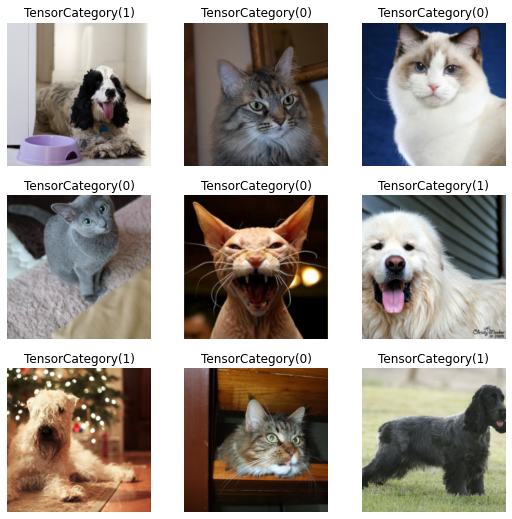

In [9]:
show_image_batch((images, labels))

# Task

1. **Evaluate `images.shape`**. What does each number represent?

In [10]:
images.shape

torch.Size([9, 3, 224, 224])

*your answer here*

2. **Evaluate `labels`**. Explain those numbers, with the help of `dataloaders.train.vocab`.

In [11]:
labels

TensorCategory([1, 0, 0, 0, 0, 1, 1, 0, 1], device='cuda:0')

In [12]:
dataloaders.train.vocab

['cat', 'dog']

*your answer here*

3. **Show the first image in the batch.** (Use `show_image`.)

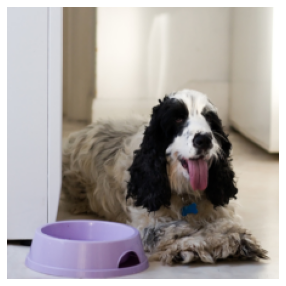

In [13]:
# your code here

4. **Show the average image.** Hint: you can compute this by taking the `.mean(axis=___)`; think about what the blank is.

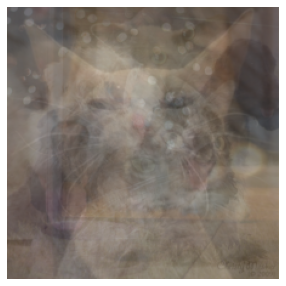

In [14]:
# your code here

5. **Show the grayscale version of all of the images.** *Do this by making minimal changes to the previous exercise; do not import anything new.*

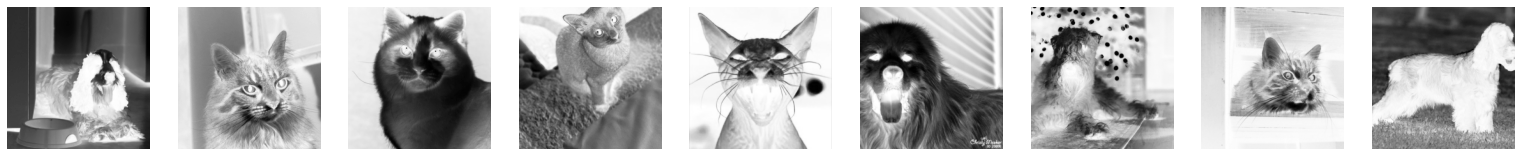

In [15]:
# your code here

6. **Invert the color of the images** (e.g., black becomes white). Show the result.

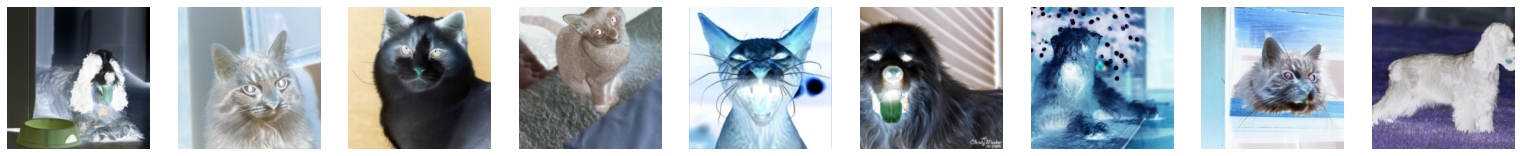

In [16]:
# your code here

7. **Black out (set to 0) the top 75 pixels of each image, then grey out (set to 0.5) the right 50 pixels of each image.**

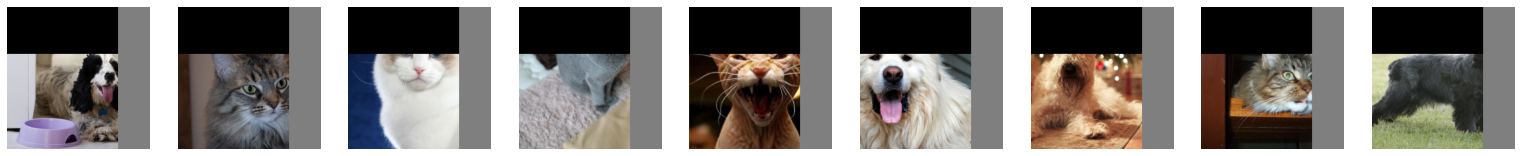

In [17]:
# your code here

In [18]:
# restore the original images for the next step
images = images_orig.clone()

8. **Show only the red color channel** by zeroing out the green and blue channels.

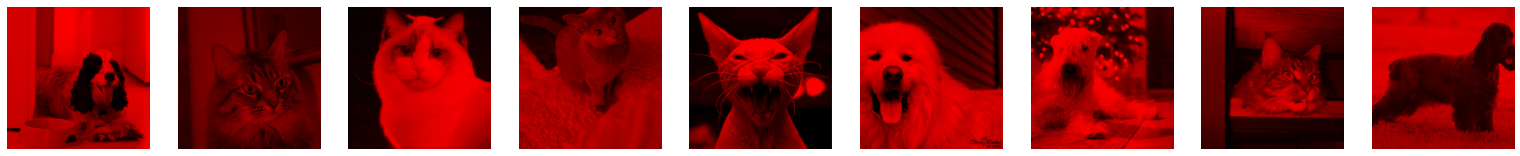

In [19]:
# your code here